In [4]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [5]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 700s 4us/step


(50000, 32, 32, 3)

In [6]:
# 50000 images of 32 by 32 of 3 RGB channels

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

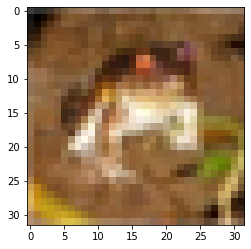

In [10]:
plt.imshow(X_train[0])

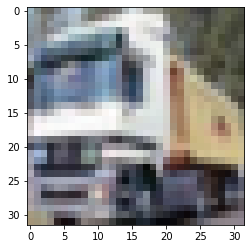

In [11]:
plt.imshow(X_train[1])

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
y_train[ : 5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
#we want to convert that 2 d array to 1d

In [15]:
#reshaping

# -1 to not to change 10000
# after that blank is left as we want to flatten that 6 in array to only 6

y_train = y_train.reshape(-1,)
y_train[ :5]   #1d array

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

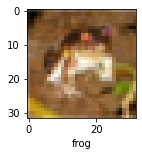

In [17]:
plot_sample(X_train,y_train,0)

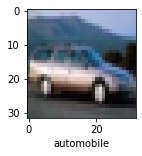

In [18]:
plot_sample(X_train,y_train,4)

#### Normalizing pixel data in arrays

In [19]:
X_train = X_train / 255

X_test = X_test / 255

### First,trying with simple artificial neural network(ANN)

In [20]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])

ann.compile(optimizer = 'SGD',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.8126 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.6266 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5444 - accuracy: 0.4540
Epoch 4/5
1563/1563 [==============================] - 107s 69ms/step - loss: 1.4831 - accuracy: 0.4769
Epoch 5/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.4318 - accuracy: 0.4948


In [21]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 9s 27ms/step - loss: 1.4880 - accuracy: 0.4732


[1.4879791736602783, 0.4731999933719635]

In [22]:
# low accuracy by ANN

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification_Report: \n', classification_report(y_test, y_pred_classes)) 

Classification_Report: 
               precision    recall  f1-score   support

           0       0.45      0.66      0.53      1000
           1       0.67      0.57      0.62      1000
           2       0.34      0.35      0.35      1000
           3       0.34      0.39      0.36      1000
           4       0.39      0.40      0.40      1000
           5       0.58      0.18      0.27      1000
           6       0.40      0.70      0.51      1000
           7       0.66      0.44      0.53      1000
           8       0.55      0.68      0.61      1000
           9       0.68      0.36      0.47      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



### Using CNN

In [24]:
cnn = models.Sequential([
    
    
    #cnn layers
    #we don't need to tell what all filters are needed
    layers.Conv2D(
        #kernel_size is filter size
        filters = 32,activation = "relu",kernel_size =(3,3),input_shape =(32,32,3)
    ),    
    layers.MaxPooling2D((2,2)),
    
    
    layers.Conv2D(filters = 32,activation = "relu",kernel_size =(3,3),input_shape =(32,32,3)),    
    layers.MaxPooling2D((2,2)),
    
    
    #dense layers
    layers.Flatten(), #no need to specify shape in middle network can find itself
    
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])


cnn.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])






In [25]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4978 - accuracy: 0.4615
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1469 - accuracy: 0.5977
Epoch 3/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.0257 - accuracy: 0.6412
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9522 - accuracy: 0.6679
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8968 - accuracy: 0.6874
Epoch 6/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8448 - accuracy: 0.7048
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8014 - accuracy: 0.7201
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7663 - accuracy: 0.7313
Epoch 9/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.7330 - accuracy: 0.7422
Epoch 10/10
1563/1563 [==============================] - 38s 24m

In [26]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9618 - accuracy: 0.6791


[0.9618129730224609, 0.679099977016449]

In [27]:
y_test 


array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

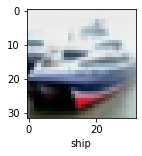

In [28]:
y_test = y_test.reshape(-1,)

plot_sample(X_test,y_test,1)

In [29]:
y_pred = cnn.predict(X_test)
y_pred[ :5]

array([[9.87859070e-03, 2.06580292e-03, 2.58928146e-02, 6.94198430e-01,
        7.72517500e-03, 2.34836787e-01, 1.77567843e-02, 1.92564481e-03,
        2.21994170e-03, 3.49996565e-03],
       [2.58184830e-03, 7.29217112e-01, 3.25401828e-07, 4.48711631e-07,
        1.13550724e-08, 1.94269134e-08, 6.14674178e-08, 2.35992470e-08,
        2.57774949e-01, 1.04253003e-02],
       [6.08218722e-02, 4.18904483e-01, 9.10153321e-04, 5.05666807e-03,
        2.83562316e-04, 4.93710919e-04, 3.26345733e-04, 2.71149998e-04,
        4.98172194e-01, 1.47599531e-02],
       [9.19955730e-01, 2.92771757e-02, 1.52980015e-02, 3.41549836e-04,
        7.98091874e-04, 3.69540357e-05, 6.18611084e-05, 5.28564560e-04,
        2.73299497e-02, 6.37213979e-03],
       [1.78927121e-06, 1.49921761e-05, 5.51723130e-03, 4.19584336e-03,
        9.80272591e-01, 1.06710766e-03, 8.90715420e-03, 2.22445688e-05,
        8.63125251e-07, 2.01890728e-07]], dtype=float32)

In [32]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[ :5]

[3, 1, 8, 0, 4]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

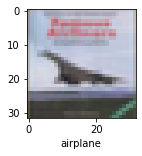

In [34]:
plot_sample(X_test,y_test,3)

In [35]:
classes[y_classes[3]]

'airplane'

In [36]:
print("Classification report: \n",classification_report(y_test,y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.78      0.71      1000
           1       0.74      0.87      0.80      1000
           2       0.54      0.58      0.56      1000
           3       0.57      0.41      0.47      1000
           4       0.62      0.58      0.60      1000
           5       0.58      0.58      0.58      1000
           6       0.83      0.71      0.76      1000
           7       0.64      0.79      0.71      1000
           8       0.85      0.75      0.79      1000
           9       0.78      0.74      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

